In [25]:
from realisation import FieldRealisation
N = 2048
scale = 2000
fr = FieldRealisation(N, scale)
fr.buildSI()  # Builds field with default scale invariant powerspectrum 
              # (As=2.1e-9, kp=0.05, ns=0.96)

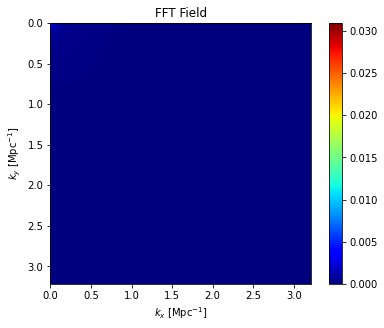

In [26]:
fr.fftField.drawField("FFT Field")

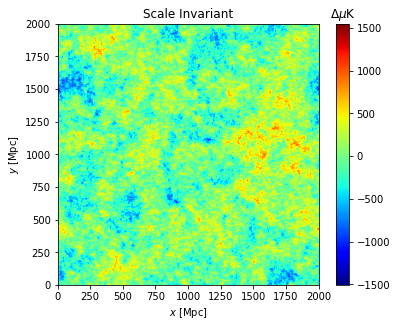

In [27]:
fr.siField.drawField("Scale Invariant", units=True)

In [28]:
import numpy as np

# Compare Fourier transformed scale invariant field with the initially generated Fourier field
si_field = fr.siField
si_fft_field = si_field.FFT()

initial_fft_field = fr.fftField

print(f"Difference: {(np.sum(np.abs(si_fft_field.field[:,:]) - np.abs(initial_fft_field.field[:,:])))}")


Difference: 1.2385680184060491e-14


In [29]:
from powerspectrum import CalculatePS
cps = CalculatePS(fr.siField, bins=100)

# Extract the input parameters of the scale invrariant power spectrum from the field
print(f"Variance = {cps.As:.4e} \u00B1 {cps.paramErrors[0]:.1e}")
print(f"Pivot scale = {cps.kp:.4f}")
print(f"Scalar spectral index = {cps.ns:.4e} \u00B1 {cps.paramErrors[1]:.1e}")

Variance = 2.0980e-09 ± 7.5e-12
Pivot scale = 0.0500
Scalar spectral index = 9.6006e-01 ± 1.0e-03


C:\Users\User\PycharmProjects\InitialConditions\InitialConditions\cmbEvolution\powerspectrum.py:95: RuntimeWarning: divide by zero encountered in power
  return a * (k / self.kp)**b


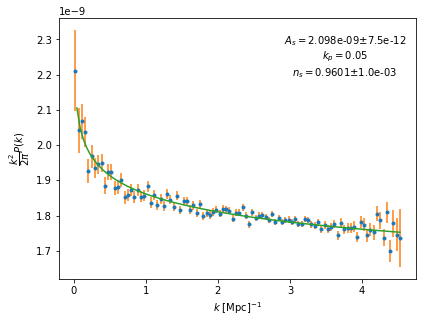

In [30]:
cps.drawPS(siFit=True)

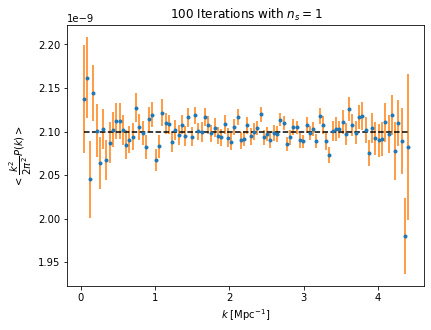

In [31]:
import matplotlib.pyplot as plt

# Check mean power spectrum of 100 scale invariant fields
# For unity scalar spectrul index, ns, spectrum should be constant 

Nloops = 100
Nbins = 100
PSs = np.zeros((Nloops, Nbins))
for iii in range(Nloops):
    fr = FieldRealisation(N=256, scale=256)
    fr.buildSI(ns=1)
    fieldFFT = fr.fftField
    fieldSI = fr.siField

    cps = CalculatePS(fieldSI, bins=100)
    PSs[iii, :] = cps.ps
    bins = cps.kBins
    
meanPS = [np.mean(PSs[:, col]) for col in range(Nbins)]
stds = [np.std(PSs[:, col]) for col in range(Nbins)]

plt.plot([bins[0], bins[-1]], [2.1e-9, 2.1e-9], ls='--', c="black")
plt.plot(bins, meanPS, ".")
plt.errorbar(bins, meanPS, yerr=stds/np.sqrt(Nloops), ls="None")
plt.title("100 Iterations with $n_s = 1$")
plt.xlabel("$k$ [Mpc$^{-1}$]")
plt.ylabel(r"$<\dfrac{k^2}{2\pi^2}P(k)>$")
plt.show()


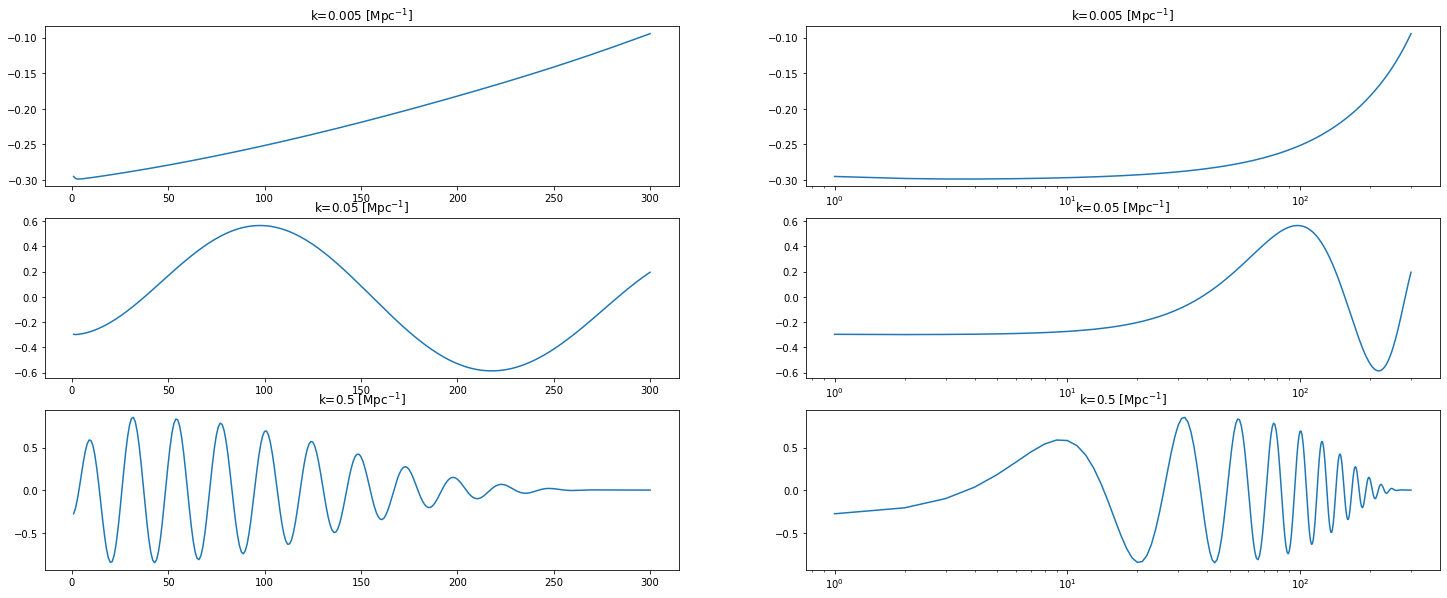

In [32]:
from transfers import TransferFuncs

plt.rcParams["figure.figsize"] = (25,10)

# Plot CAMB transfer function at k = 0.005, 0.05, 0.5

etas = np.linspace(1, 300, 300)
ks = [0.005, 0.05, 0.5]
tfs = TransferFuncs(ks, etas).tfs
for iii, k in enumerate(ks):
    
    plt.subplot(len(ks), 2, (iii+1)*2 - 1)
    plt.plot(etas, tfs[iii, :, 0])
    plt.title(f"k={k} [Mpc$^{{-1}}$]")
    
    plt.subplot(len(ks), 2, (iii+1)*2)
    plt.semilogx(etas, tfs[iii, :, 0])
    plt.title(f"k={k} [Mpc$^{{-1}}$]")


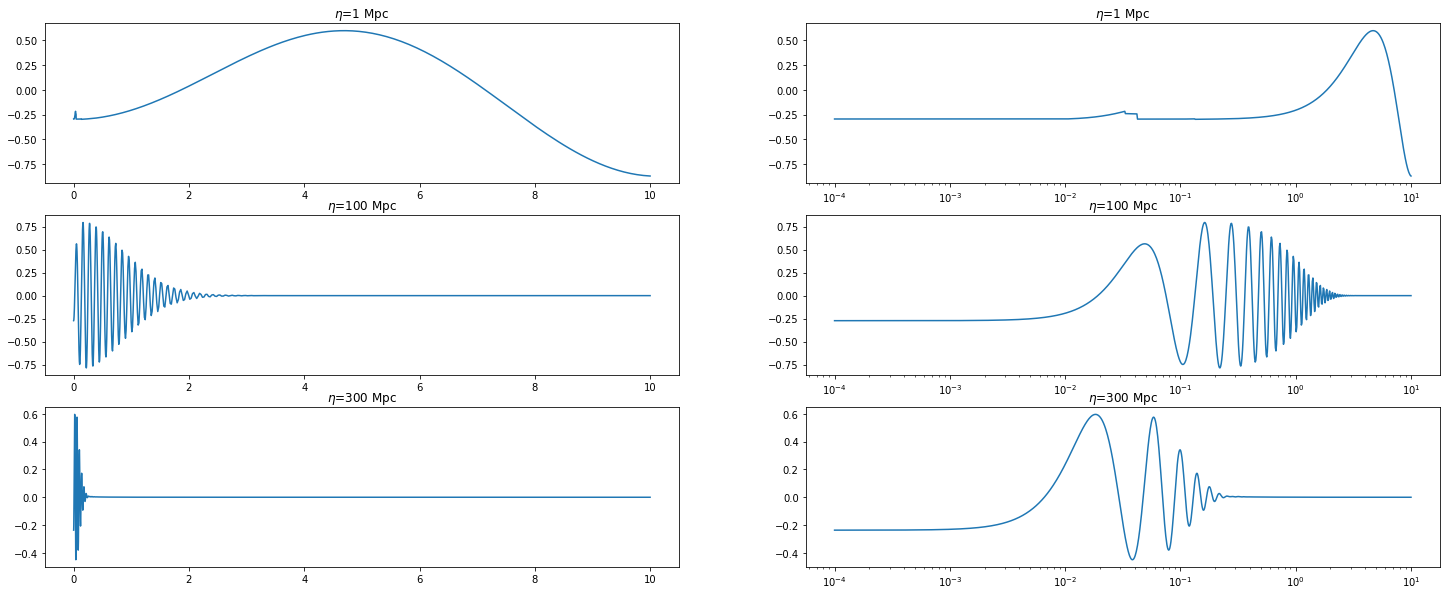

In [33]:
# Plot CAMB transfer function at eta = 1, 100, 300

etas = [1, 100, 300]
ks = np.logspace(-4, 1, 1000)
tfs = TransferFuncs(ks, etas).tfs
for iii, eta in enumerate(etas):
    
    plt.subplot(len(etas), 2, (iii+1)*2 - 1)
    plt.plot(ks, tfs[:, iii, 0])
    plt.title(f"$\eta$={eta} Mpc")
    
    plt.subplot(len(etas), 2, (iii+1)*2)
    plt.semilogx(ks, tfs[:, iii, 0])
    plt.title(f"$\eta$={eta} Mpc")

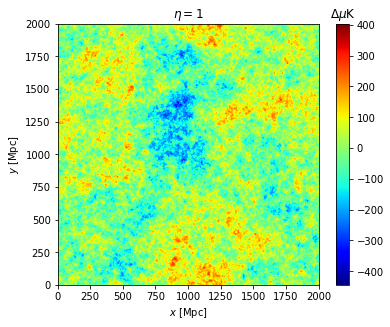

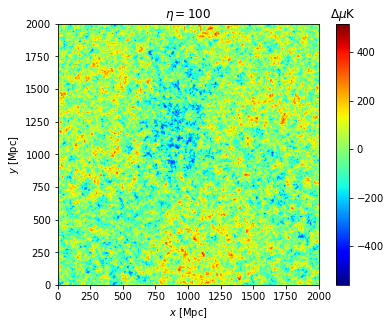

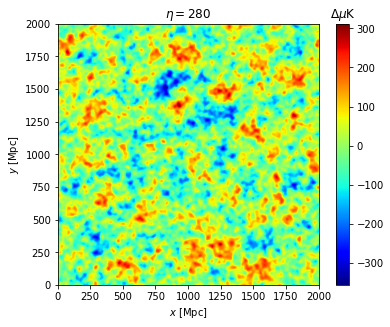

In [34]:
plt.rcParams["figure.figsize"] = (6.4,4.8)

# Calculate and show the monopole source at eta = 1, 100, 280

fr = FieldRealisation(N, scale)
fr.buildSI()
etas = [1, 100, 280]
for eta in etas:
    fr.calcField(eta)
    fr.realField.drawField(f"$\eta = ${eta}", units=True)

C:\Users\User\PycharmProjects\InitialConditions\InitialConditions\cmbEvolution\powerspectrum.py:92: RuntimeWarning: divide by zero encountered in power
  return a * (k / (self.kp*self.distToLastScatter))**b * self.microKelvinSqr


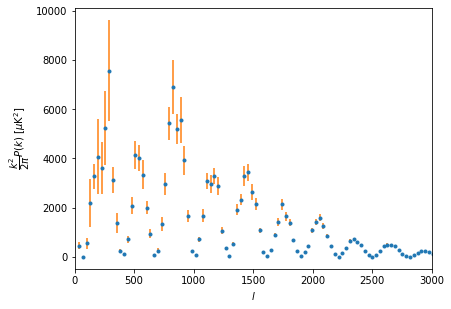

In [38]:
from powerspectrum import CalculatePS

# Calculate power spectrum for the monopole field at given eta

fr.calcField(eta=280)
cps = CalculatePS(fr.realField, bins=2000)

cps.drawPS(units=True)    
plt.xlim(0,3000)
plt.show()

In [36]:
from IPython.display import HTML
# Output from videobuilder of monopole evolution up to recombination 
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="videos/monopole_video_1024_1000.mp4" type="video/mp4">
</video></div>""")